In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [51]:
experiment = '1'
first = f'{experiment}.1'
second = f'{experiment}.2'
third = f'{experiment}.3'
# name = 'online-agent-percentage'

In [52]:
data1 = pd.read_csv('experiments/baseline-experiment.csv', skiprows=6)
data2 = pd.read_csv(f'experiments/experiment {first}.csv', skiprows=6)
data3 = pd.read_csv(f'experiments/experiment {second}.csv', skiprows=6)
data4 = pd.read_csv(f'experiments/experiment {third}.csv', skiprows=6)

In [53]:
def calculate_coverage(data, run_number):
    coverages = []
    run_data = data[data['[run number]'] == run_number]
    for _, row in run_data.iterrows():
        opinions = list(map(float, row['[opinion] of turtles'].strip('[]').split()))
        unique_opinions = len(set(opinions))
        total_possible_opinions = len(np.arange(0, 1, 0.01)) 
        coverage = unique_opinions / total_possible_opinions
        coverages.append(coverage)
    return coverages

coverages1 = calculate_coverage(data1, 1)
coverages2 = calculate_coverage(data2, 1)
coverages3 = calculate_coverage(data3, 2)
coverages4 = calculate_coverage(data4, 4)

df = pd.DataFrame({
    'run_index': np.tile(np.arange(len(coverages1)), 4),
    'coverage': coverages1 + coverages2 + coverages3 + coverages4,
    'run': ['Baseline'] * len(coverages1) + [f'Experiment {first}'] * len(coverages2) + [f'Experiment {second}'] * len(coverages3) + [f'Experiment {third}'] * len(coverages4)
})

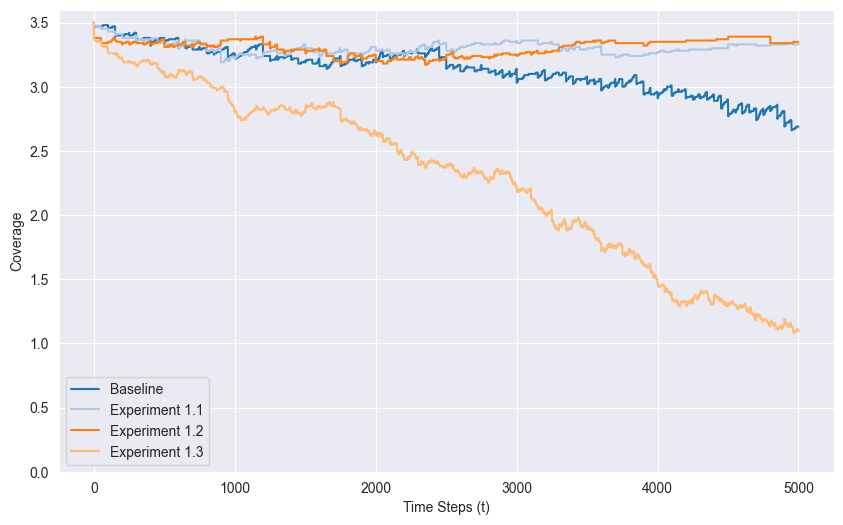

In [54]:
sns.set_palette("tab20")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='run_index', y='coverage', hue='run', palette='tab20', errorbar=None)
plt.xlabel('Time Steps (t)')
plt.ylabel('Coverage')
plt.ylim(0, 3.6)
plt.legend()
plt.grid(True)
plt.savefig(f'plots/polarisation/coverage/experiment-{experiment}-coverage.png', dpi=300)
plt.show()